In [1]:
import cv2
import PIL
import os
import tensorflow as tf
import matplotlib.pyplot as pt
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

In [3]:
data_dir

WindowsPath('C:/Users/91630/.keras/datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('C:/Users/91630/.keras/dataset

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [6]:
img_count=len(list(data_dir.glob('*/*.jpg')))
img_count

3670

In [7]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:2]

[WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg')]

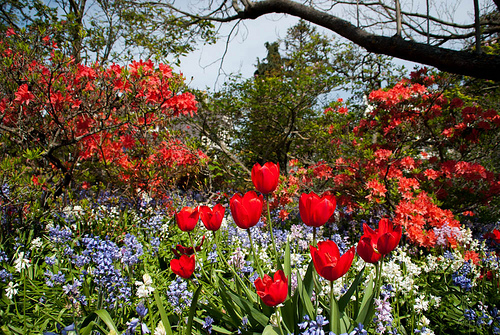

In [8]:
PIL.Image.open(str(tulips[5]))

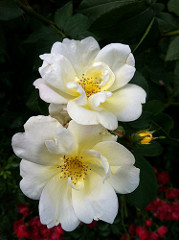

In [9]:
roses = list(data_dir.glob('roses/*.jpg'))
PIL.Image.open(str(roses[0]))

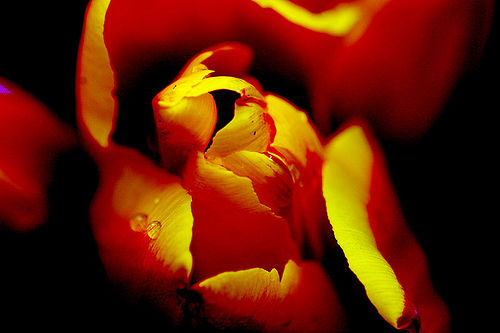

In [10]:
tulips=list(data_dir.glob('tulips/*.jpg'))
PIL.Image.open(str(tulips[8]))

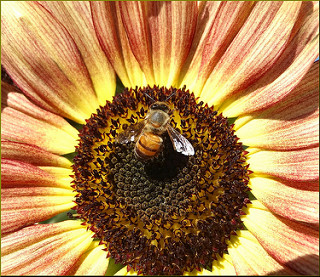

In [11]:
sunflowers=list(data_dir.glob('sunflowers/*.jpg'))
PIL.Image.open(str(sunflowers[5]))

In [12]:
flowers_image_dict = {'roses': list(data_dir.glob('roses/*')),
                     'daisy': list(data_dir.glob('daisy/*')),
                     'dandelion': list(data_dir.glob('dandelion/*')),
                     'sunflower': list(data_dir.glob('sunflower/*')),
                     'tulips': list(data_dir.glob('tulips/*'))}

In [13]:
flowers_image_dict['roses']

[WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('C:/Users/91630/.keras/data

In [14]:
flowers_image_dict['daisy']

[WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('C:/Users/91630/.keras/dataset

In [15]:
flowers_image_dict['dandelion']

[WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/dandelion/10477378514_9ffbcec4cf_m.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/dandelion/10486992895_20b344ce2d_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/dandelion/10617162044_8740d4dd9f_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/dandelion/10617191174_9a01753241_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/dandelion/10683189_bd6e371b97.jpg'),


In [16]:
flowers_image_dict['tulips']

[WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/tulips/10791227_7168491604.jpg'),
 WindowsPath('C:/Users/91630/.keras/datasets/flower_photos/tulips/10995953955_089572caf0.jpg'),
 WindowsPath('C:/Users/91630/.keras/datas

In [18]:
flowers_labels_dict = {'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflower': 3, 'tulips': 4}

In [19]:
str(flowers_image_dict['roses'][0])

'C:\\Users\\91630\\.keras\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [21]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [23]:
img.shape

(240, 179, 3)

In [22]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [25]:
for flower_name, images in flowers_image_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflower
0
tulips
799


In [27]:
x, y = [], []

for flower_name,images in flowers_image_dict.items():
    for images in images:
        img = cv2.imread(str(images))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [28]:
x[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [29]:
x = np.array(x)
y = np.array(y)

In [30]:
x

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [31]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state=10)

In [36]:
print(x_train.shape)
print(x_train.size)

(2228, 180, 180, 3)
216561600


In [37]:
print(x_test.shape)
print(x_test.size)

(743, 180, 180, 3)
72219600


In [38]:
print(y_train.shape)
print(y_train.size)

(2228,)
2228


In [39]:
print(y_test.shape)
print(y_test.size)

(743,)
743


In [40]:
x_train_sca = x_train/255
x_test_sca = x_test / 255

In [41]:
x_train_sca[0]

array([[[0.98431373, 0.87843137, 0.77254902],
        [0.98823529, 0.88235294, 0.77647059],
        [0.98823529, 0.88235294, 0.77647059],
        ...,
        [0.15294118, 0.14509804, 0.10588235],
        [0.4       , 0.25882353, 0.21176471],
        [0.9372549 , 0.78039216, 0.70196078]],

       [[0.98823529, 0.88627451, 0.78039216],
        [0.98823529, 0.88627451, 0.78039216],
        [0.99607843, 0.88627451, 0.78039216],
        ...,
        [0.08235294, 0.14901961, 0.09019608],
        [0.15294118, 0.14117647, 0.07058824],
        [0.50980392, 0.37647059, 0.30196078]],

       [[0.99215686, 0.88627451, 0.78039216],
        [0.99215686, 0.88627451, 0.78039216],
        [0.99607843, 0.89019608, 0.78431373],
        ...,
        [0.09803922, 0.1372549 , 0.09019608],
        [0.10196078, 0.17254902, 0.10980392],
        [0.16078431, 0.14117647, 0.0745098 ]],

       ...,

       [[0.57647059, 0.65098039, 0.73333333],
        [0.56470588, 0.63921569, 0.71372549],
        [0.58431373, 0

In [43]:
num_class = 5

ml = Sequential([layers.Conv2D(16,3,padding='same', activation='relu'),
                layers.MaxPooling2D(),
                layers.Conv2D(32,3, padding='same', activation='relu'),
                layers.MaxPooling2D(),
                layers.Conv2D(64,3, padding='same', activation='relu'),
                layers.MaxPooling2D(),
                layers.Flatten(),
                layers.Dense(128,activation='relu'),
                layers.Dense(num_class)])
ml.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [44]:
ml.fit(x_train_sca, y_train, epochs=30)

Epoch 1/30
70/70 [==============================] - 47s 626ms/step - loss: 1.3169 - accuracy: 0.4013
Epoch 2/30
70/70 [==============================] - 42s 603ms/step - loss: 0.9633 - accuracy: 0.5952
Epoch 3/30
70/70 [==============================] - 43s 619ms/step - loss: 0.7992 - accuracy: 0.6777
Epoch 4/30
70/70 [==============================] - 43s 618ms/step - loss: 0.6517 - accuracy: 0.7504
Epoch 5/30
70/70 [==============================] - 42s 604ms/step - loss: 0.4919 - accuracy: 0.8241
Epoch 6/30
70/70 [==============================] - 44s 624ms/step - loss: 0.3457 - accuracy: 0.8748
Epoch 7/30
70/70 [==============================] - 43s 621ms/step - loss: 0.2189 - accuracy: 0.9273
Epoch 8/30
70/70 [==============================] - 43s 612ms/step - loss: 0.1141 - accuracy: 0.9686
Epoch 9/30
70/70 [==============================] - 44s 624ms/step - loss: 0.1118 - accuracy: 0.9636
Epoch 10/30
70/70 [==============================] - 44s 623ms/step - loss: 0.0937 - accura

In [46]:
ml.evaluate(x_test_sca,y_test)

24/24 [==============================] - 4s 163ms/step - loss: 2.5375 - accuracy: 0.6339


[2.5375308990478516, 0.6339165568351746]

In [47]:
preditions = ml.predict(x_test_sca)
preditions

24/24 [==============================] - 4s 162ms/step


array([[ 9.2993937e+00,  9.9252663e+00,  4.7100377e+00, -2.1569197e+01,
         6.2750325e+00],
       [ 6.4929566e+00,  7.0634761e+00,  7.5447893e+00, -2.2377714e+01,
         1.0275470e+01],
       [ 3.7839237e+01,  3.9689224e+01, -9.4360790e+00, -6.0590328e+01,
         2.0259758e+01],
       ...,
       [-4.7977809e-03,  1.0232030e+00,  2.5410816e+01, -2.3387661e+01,
        -3.6063409e+00],
       [ 2.3036180e+01,  1.1776474e+01, -1.0269595e+01, -3.3618801e+01,
         1.9475943e+01],
       [-1.1899087e+00,  7.0181170e+00,  1.3743344e+01, -1.7800461e+01,
         3.1437290e-01]], dtype=float32)

In [49]:
scores = tf.nn.softmax(preditions[0])
scores

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.4145716e-01, 6.3848287e-01, 3.4689996e-03, 1.3405337e-14,
       1.6591012e-02], dtype=float32)>

In [51]:
np.argmax(scores)

1

In [52]:
y_test[0]

1

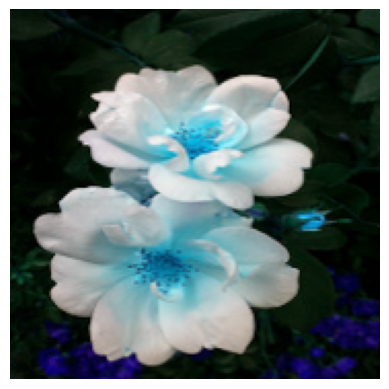

In [55]:
pt.axis('off')
pt.imshow(x[0])

In [64]:
data_aug = keras.Sequential([layers.experimental.preprocessing.RandomZoom(0.4)])
data_aug(x)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[  0.6290711 ,   8.238111  ,   0.7618896 ],
        [  1.0911977 ,   9.448963  ,   1.3092763 ],
        [  1.9442797 ,  11.288876  ,   2.1623583 ],
        ...,
        [  1.5373626 ,   8.236014  ,   0.77337646],
        [  1.269862  ,   9.116826  ,   1.3866882 ],
        [  1.5815128 ,   9.112786  ,   1.8471497 ]],

       [[  0.17385808,   7.695968  ,   0.6474792 ],
        [  0.42010048,   8.864795  ,   1.2471915 ],
        [  1.5788705 ,  11.250174  ,   2.5423281 ],
        ...,
        [  1.631678  ,   8.493011  ,   1.237417  ],
        [  1.0868955 ,  10.332947  ,   2.123465  ],
        [  1.801484  ,  10.044221  ,   2.487939  ]],

       [[  0.6534137 ,   7.935746  ,   0.75350845],
        [  0.96556646,   9.410261  ,   1.3157198 ],
        [  3.6289043 ,  13.300207  ,   4.491566  ],
        ...,
        [  1.5223172 ,   8.493011  ,   1.4389943 ],
        [  2.8582678 ,  10.332947  ,   3.0773356 ],
        [  3.53536

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


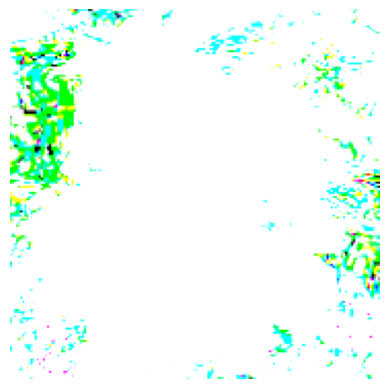

In [65]:
pt.axis('off')
pt.imshow(data_aug(x)[0])

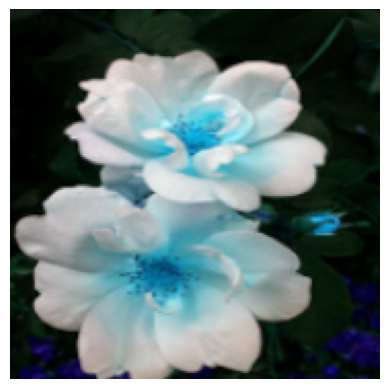

In [66]:
pt.axis('off')
pt.imshow(data_aug(x)[0].numpy().astype('uint8'))

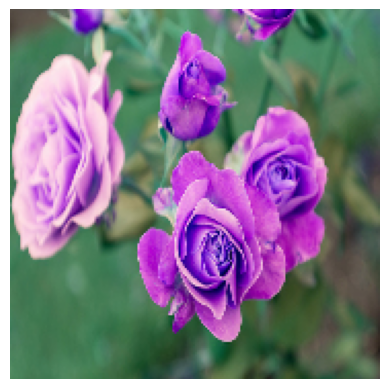

In [67]:
pt.axis('off')
pt.imshow(x[9])

In [72]:
data_aug1 = tf.keras.Sequential([layers.experimental.preprocessing.RandomZoom(0.9)])

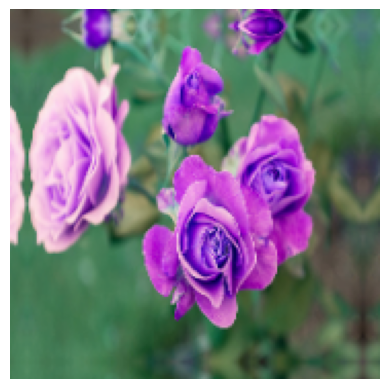

In [73]:
pt.axis('off')
pt.imshow(data_aug1(x)[9].numpy().astype('uint8'))

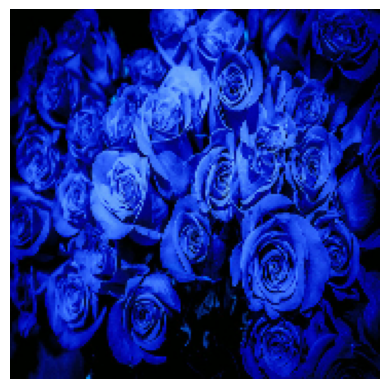

In [74]:
pt.axis('off')
pt.imshow(x[2])

In [77]:
data_aug2 = keras.Sequential([layers.experimental.preprocessing.RandomContrast(0.9)])

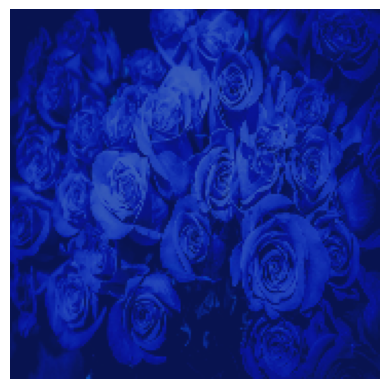

In [78]:
pt.axis('off')
pt.imshow(data_aug2(x)[2].numpy().astype('uint8'))

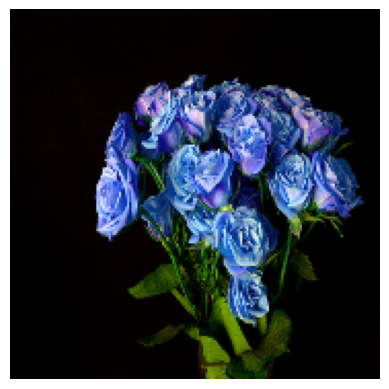

In [84]:
pt.axis('off')
pt.imshow(x[33])

In [79]:
data_aug3 = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.4)])

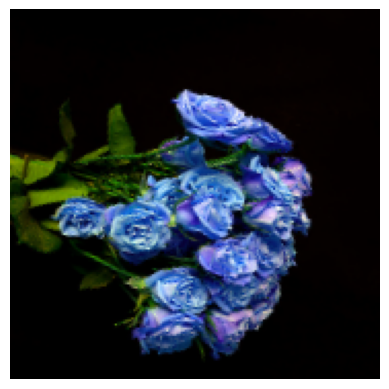

In [85]:
pt.axis('off')
pt.imshow(data_aug3(x)[33].numpy().astype('uint8'))